Step 1: Load data & importing libraries

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("customer_data.csv")

Inspect the dataset

In [2]:
print(df.shape)  # Rows & Columns

(200, 5)


In [3]:
print(df.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(df.describe())  # Summary statistics

       CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [5]:
print(df.duplicated().sum())  # Count duplicate rows

0


Step 2: Data Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
features = ["Age", "Annual_Income_(k$)", "Spending_Score"]
X = df[features]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 3: Clustering

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

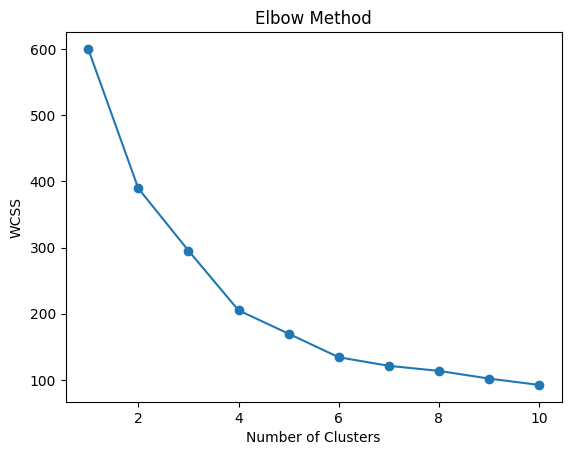

In [8]:
# Plot the elbow graph
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Apply K-Means with Optimal Clusters

In [9]:
# Assuming the elbow point suggests k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

Step 4: Visualization

2D Scatter Plot using PCA

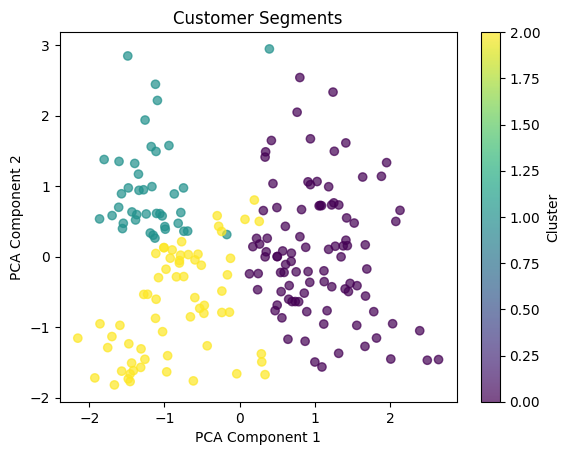

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments")
plt.colorbar(label="Cluster")
plt.show()

Pairplot to Visualize Feature Relationships

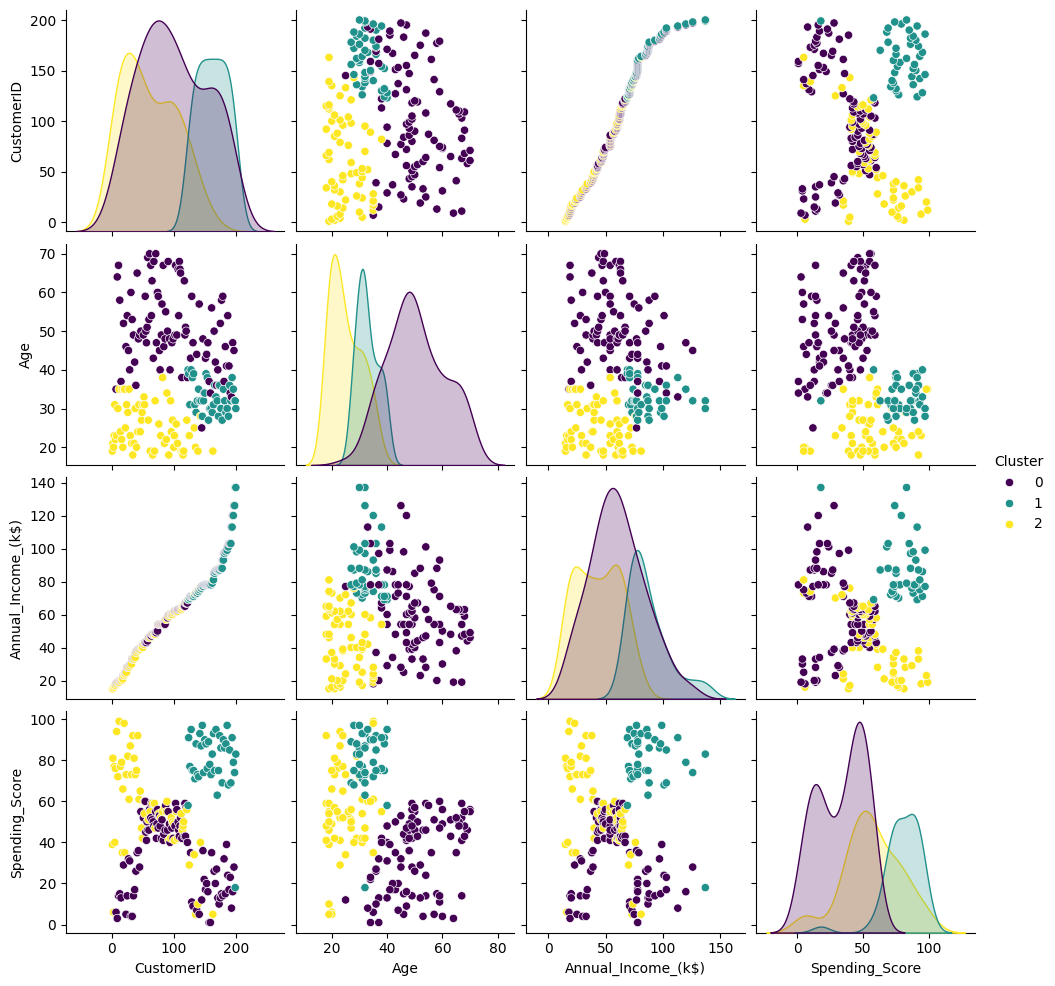

In [11]:
import seaborn as sns

sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="viridis")
plt.show()

Step 5: Recommendation

In [14]:
# Get the mean values for each cluster
cluster_summary = df.groupby("Cluster")[["Age", "Annual_Income_(k$)", "Spending_Score"]].mean()
print("Cluster Summary:\n", cluster_summary)

# Define marketing strategies based on cluster characteristics
def recommend_strategy(cluster_id):
    if cluster_id == 0:  # Example: Young Spenders
        return "Target with premium products & exclusive discounts."
    elif cluster_id == 1:  # Example: High-Income, Low-Spending
        return "Offer loyalty programs and personalized deals."
    elif cluster_id == 2:  # Example: Budget-Conscious Buyers
        return "Focus on budget-friendly promotions and discounts."
    else:
        return "General engagement strategy."

# Apply recommendations to each customer based on their cluster
df["Marketing Strategy"] = df["Cluster"].apply(recommend_strategy)

# Save the dataset with recommendations
df.to_csv("customer_segments_with_recommendations.csv", index=False)

# Display sample output
print(df[["CustomerID", "Cluster", "Marketing Strategy"]].head())


Cluster Summary:
                Age  Annual_Income_(k$)  Spending_Score
Cluster                                               
0        50.406250           60.468750       33.343750
1        32.853659           87.341463       79.975610
2        25.142857           43.269841       56.507937
   CustomerID  Cluster                                 Marketing Strategy
0           1        2  Focus on budget-friendly promotions and discou...
1           2        2  Focus on budget-friendly promotions and discou...
2           3        2  Focus on budget-friendly promotions and discou...
3           4        2  Focus on budget-friendly promotions and discou...
4           5        2  Focus on budget-friendly promotions and discou...
